# *Banking marketing campaign data*

  The used dataset contains banking marketing campaign data and we can use it to optimize marketing campaigns to attract more customers to term deposit subscription.
  The main aim for building the  deep learning network to predict if a customer will subscribe to term deposit plan. This helps to find out the ways how to make marketing campaigns more efficient.

  # **Approach**

  In order to optimize marketing campaigns with the help of the dataset, we will have to take the following steps:

*   Import data from dataset and perform initial high-level analysis: look at the number of rows, look at the missing values, look at dataset columns and their values respective to the campaign outcome.

*    Clean the data: remove irrelevant columns, deal with missing and incorrect values, turn categorical columns into dummy variables.

*   Use a deep neural network  to predict the marketing campaign outcome and to find out factors, which affect the success of the campaign.





In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical


In [3]:
#importing the dataset
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [4]:
data = pd.read_csv('bank.csv')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## Exploratory data analysis and visualization

In [ ]:
data.shape

(11162, 17)

In [ ]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
#Separating the categorical and numerical columnn
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']
num_columns = data[['age','balance', 'day','duration', 'campaign', 'pdays', 'previous']]


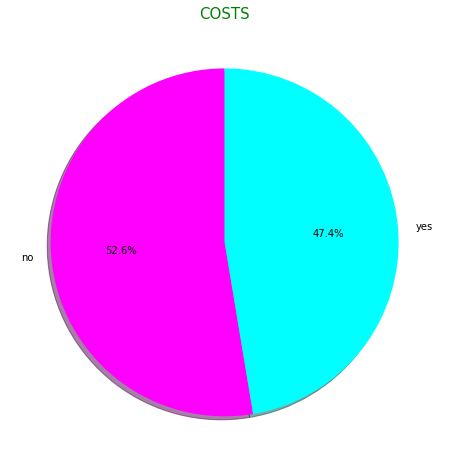

In [ ]:
#Exploring the distribution of the label
labels = data["deposit"].value_counts().index
sizes = data["deposit"].value_counts()
colors = ['magenta','cyan']
plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, rotatelabels=False, autopct='%1.1f%%',colors=colors,shadow=True, startangle=90)
plt.title('COSTS',color = 'green',fontsize = 15)
plt.show()

The count of NO is slightly higher than than of Yes.There is slight imbalance in the label

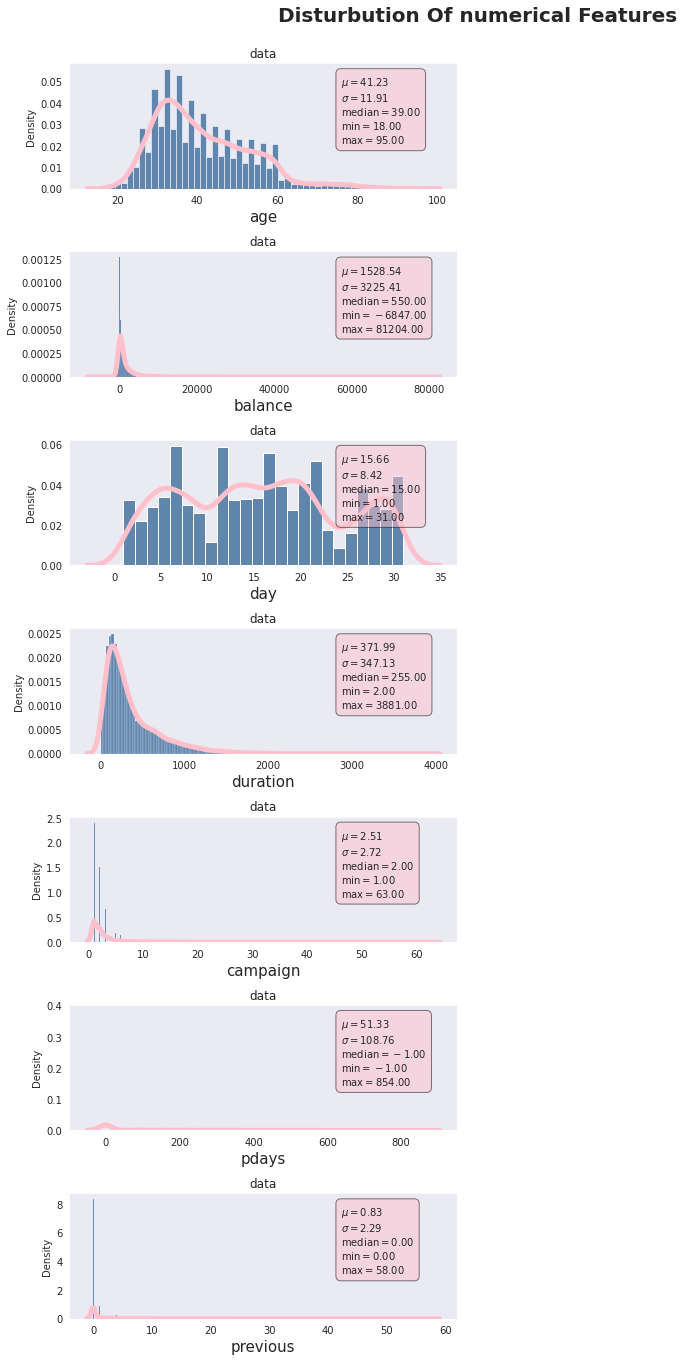

In [ ]:
import numpy as np
sns.set_style('darkgrid')
color = 'royalblue'

plt.figure(figsize = (12,55))
i = 0
for index, col in enumerate(list(num_columns.columns.values)):
    i += 1 ;
    plt.subplot(21,2, index + i)
    ax = sns.histplot(x = col, data = num_columns, color = "#326598", stat = "density", common_norm=False)
    sns.kdeplot(x = col, data = num_columns, color = "pink", linewidth = 5)
    plt.xlabel(col, size = 15)
    plt.title('data')
    # set text on axes
    textstr_train = '\n'.join((
    r'$\mu=%.2f$' %num_columns[col].mean(),
    r'$\sigma=%.2f$' %num_columns[col].std(),
    r'$\mathrm{median}=%0.2f$' %np.median(num_columns[col]),
    r'$\mathrm{min}=%.2f$' %num_columns[col].min(),
    r'$\mathrm{max}=%.2f$' %num_columns[col].max()
    ))
    ax.text(0.7, 0.90, textstr_train, transform=ax.transAxes, fontsize=10, verticalalignment='top',
                     bbox=dict(boxstyle='round',facecolor='pink', edgecolor='black', pad=0.5, alpha = 0.5))
    
   
    plt.grid()

plt.suptitle("Disturbution Of numerical Features", y = 1, x = 0.55, size = 20,
    fontweight = "bold")
plt.tight_layout()
plt.show()

In [ ]:
#value count on each categorical column
for i,c in enumerate(cat_columns):
  print(data[c].value_counts())

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64
married     6351
single      3518
divorced    1293
Name: marital, dtype: int64
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64
no     10994
yes      168
Name: default, dtype: int64
no     5881
yes    5281
Name: housing, dtype: int64
no     9702
yes    1460
Name: loan, dtype: int64
cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
mar     276
dec     110
Name: month, dtype: int64
unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64


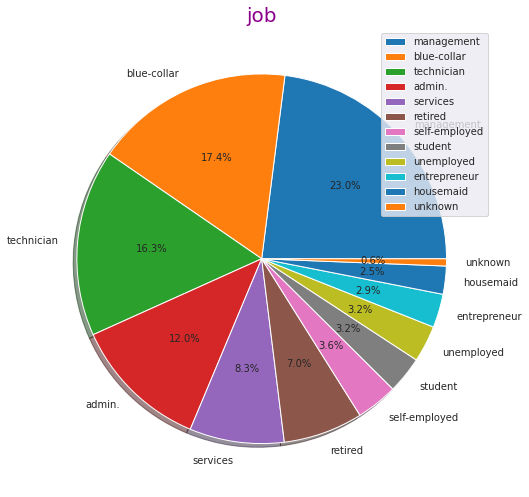

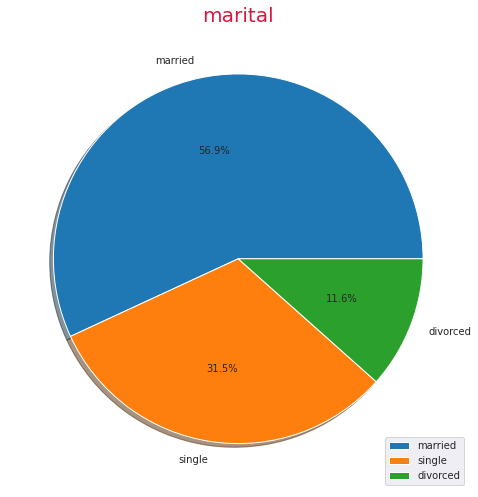

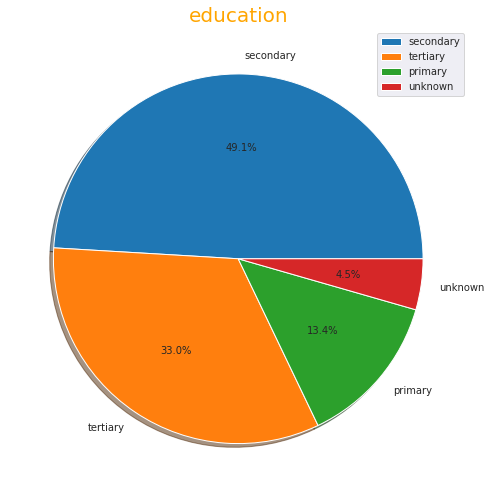

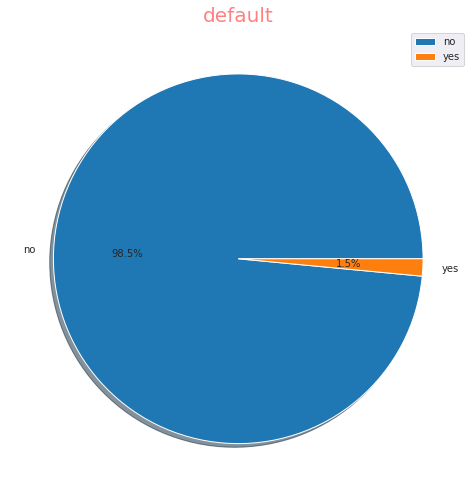

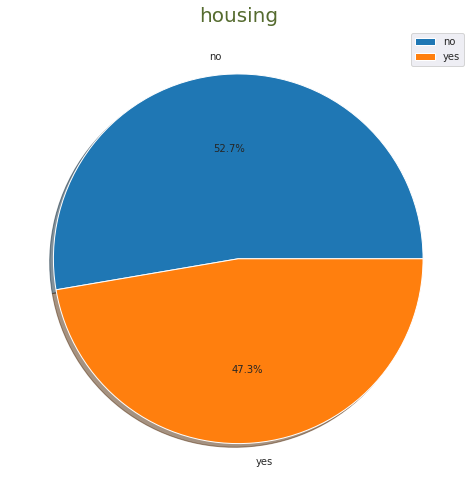

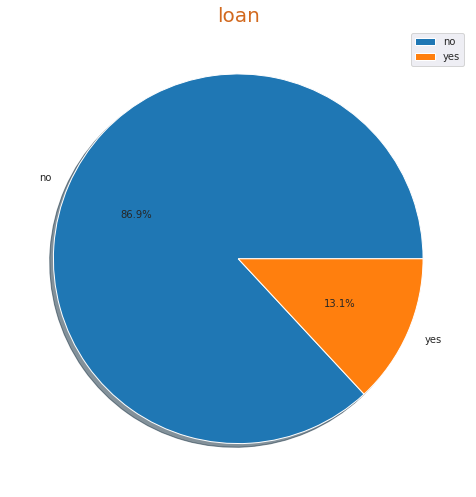

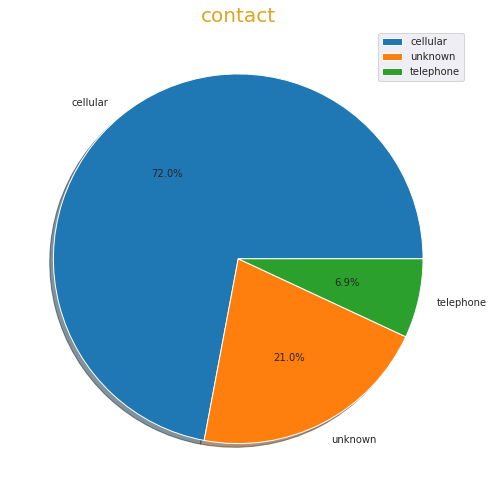

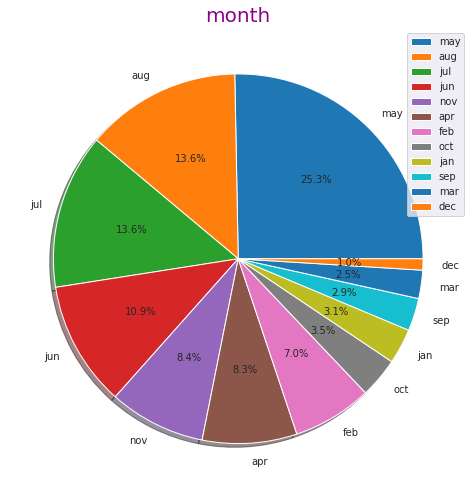

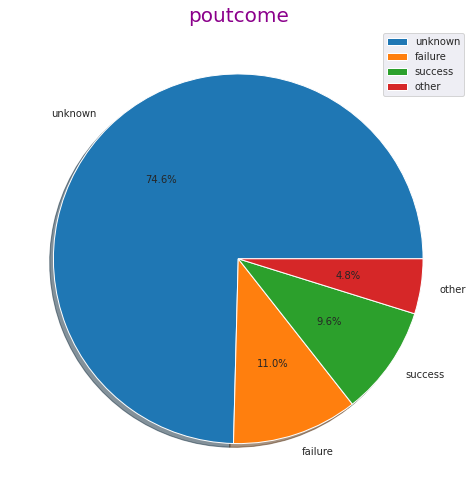

In [ ]:
colors_cat=['#8B008B','#DC143C','#FFA500','#ff8080','#556B2F','#D2691E','#DAA520','#8B008B','#8B008B']
for i,c in enumerate(cat_columns):
    plt.figure(figsize =(14.5, 8.5))
    plt.pie(data[c].value_counts() ,labels=list(data[c].value_counts().index),shadow = True,autopct='%1.1f%%')
    plt.legend()
    plt.title(c,color=colors_cat[i],fontsize=20)

The pie plot above shows the distriburtion of the categorical variables in each column. There is also high imbalance in the categorical features 

<AxesSubplot:title={'center':'Job and deposit'}>

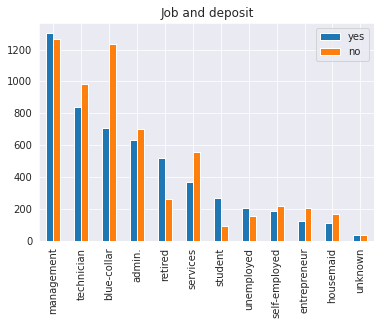

In [ ]:
#Visualizing how 'deposit' column value varies depending on other categorical columns' values:

#job and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['job'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['job'].value_counts()

j_df.plot.bar(title = 'Job and deposit')

<AxesSubplot:title={'center':'Marital status and deposit'}>

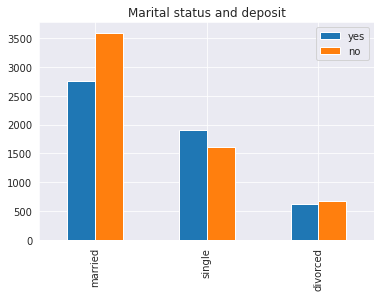

In [ ]:
#marital status and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['marital'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['marital'].value_counts()

j_df.plot.bar(title = 'Marital status and deposit')

<AxesSubplot:title={'center':'Education and deposit'}>

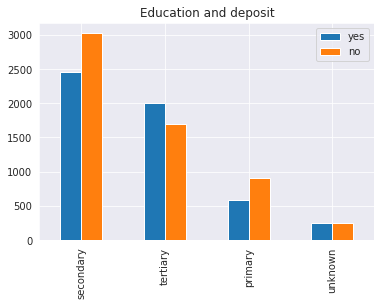

In [ ]:
#education and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['education'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['education'].value_counts()

j_df.plot.bar(title = 'Education and deposit')

<AxesSubplot:title={'center':'Type of contact and deposit'}>

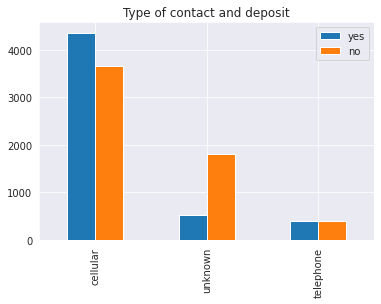

In [ ]:
#type of contact and deposit
j_df = pd.DataFrame()

j_df['yes'] = data[data['deposit'] == 'yes']['contact'].value_counts()
j_df['no'] = data[data['deposit'] == 'no']['contact'].value_counts()

j_df.plot.bar(title = 'Type of contact and deposit')

From the diagrams we can tell that according to our dataset:



*   Customers with 'blue-collar' and 'services' jobs are less likely to subscribe for term deposit while those with management jobs and retired person are more likely to subscribe for term deposit
*   Customers with 'cellular' type of contact are more likely to subscribe for term 

*   Married customers are less likely to subscribe for term deposit.

*   Customers with tertiary education are more likely to subscribe for term deposit plan



In [ ]:
a_df = pd.DataFrame()
a_df['age_yes'] = (data[data['deposit'] == 'yes'][['deposit','age']].describe())['age']
a_df['age_no'] = (data[data['deposit'] == 'no'][['deposit','age']].describe())['age']

a_df

,age_yes,age_no
count,5289.000000,5873.000000
mean,41.670070,40.837391
std,13.497781,10.264815
min,18.000000,18.000000
25%,31.000000,33.000000
50%,38.000000,39.000000
75%,50.000000,48.000000
max,95.000000,89.000000


<AxesSubplot:title={'center':'Age and deposit statistics'}>

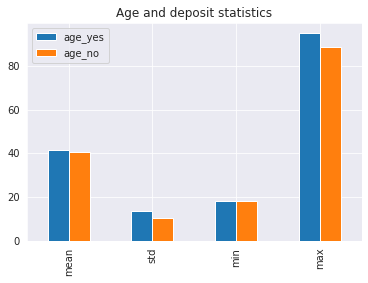

In [ ]:
a_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'Age and deposit statistics')

In [ ]:
b_df = pd.DataFrame()
b_df['balance_yes'] = (data[data['deposit'] == 'yes'][['deposit','balance']].describe())['balance']
b_df['balance_no'] = (data[data['deposit'] == 'no'][['deposit','balance']].describe())['balance']

b_df

,balance_yes,balance_no
count,5289.000000,5873.000000
mean,1804.267915,1280.227141
std,3501.104777,2933.411934
min,-3058.000000,-6847.000000
25%,210.000000,64.000000
50%,733.000000,414.000000
75%,2159.000000,1324.000000
max,81204.000000,66653.000000


<AxesSubplot:title={'center':'balance and deposit statistics'}>

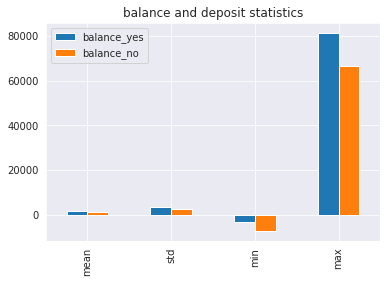

In [ ]:
b_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = 'balance and deposit statistics')

From the diagrams above, 


*   Most Customers subscribing for term deposit plan have high balance and are of older age group


In [6]:
#Data Transformation

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_columns:
    data[col] = le.fit_transform(data[col])
    
    
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,yes
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,yes
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,yes
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,yes
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,yes


In [7]:
# seperating features and labels
features = data.drop('deposit', axis = 1)
y = data['deposit'].values 

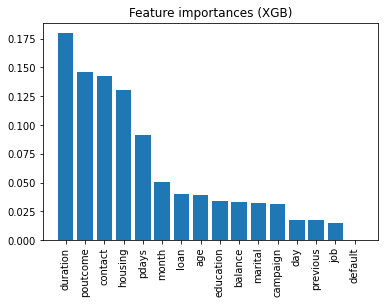

In [ ]:
#feature importances i using the xgboost  model
import numpy as np

import xgboost
xgb = xgboost.XGBClassifier().fit(features,y)     
headers = ["name", "score"]
values = sorted(zip(features.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)


'''
The zip() function is used to combine two iterables into a tuple. 
It is combining the column names from the features set (features.columns) and the corresponding feature importances from the trained XGBoost model (xgb.feature_importances_) into a tuple for each feature.

The sorted() function sorts the tuples in decreasing order of importance score.

 The key argument is used to specify the sorting criterion. Here, lambda x: x[1] * -1 is a lambda function that takes each tuple (x) and returns the second element of the tuple (x[1]) multiplied by -1.
 This will sort the tuples in descending order of importance score.

Finally, the sorted tuples are stored in a DataFrame with column names "name" and "score" using the pd.DataFrame() function.
'''


#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()


From the diagram showing the feature importance, the important features are 


*   Duration
*   pay outcome
*   Contact
*   housing
*   Paydays





In [8]:
X = data[['duration','poutcome','contact','housing','pdays']]

In [9]:
from sklearn.preprocessing import LabelEncoder as Lb

encoder = Lb() #create an object of the Label Encoder class
encoder.fit(y)
encoded_Y = encoder.transform(y)


Y = to_categorical(encoded_Y)

In [10]:
#Data spliting
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state= 40)

#Spliting the training model into model and validation
x_model,x_val,y_model,y_val = train_test_split(x_train,y_train,test_size=0.2)

In [11]:
## Building the neural network
from keras.layers import Dropout


model = Sequential([

Dense(75, input_dim =5, activation ='relu'),
Dropout(0.5),
Dense(75, activation='relu'),
Dropout(0.5),
Dense(2,activation='sigmoid')
])
   

In [19]:
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

history = model.fit(x_model, y_model, validation_data= (x_val, y_val), epochs=70, batch_size = 50)
     

Epoch 1/70
125/125 [==============================] - 2s 7ms/step - loss: 0.4672 - accuracy: 0.7853 - val_loss: 0.4980 - val_accuracy: 0.7754
Epoch 2/70
125/125 [==============================] - 1s 5ms/step - loss: 0.4764 - accuracy: 0.7845 - val_loss: 0.4730 - val_accuracy: 0.7742
Epoch 3/70
125/125 [==============================] - 1s 5ms/step - loss: 0.4664 - accuracy: 0.7806 - val_loss: 0.4722 - val_accuracy: 0.7812
Epoch 4/70
125/125 [==============================] - 1s 5ms/step - loss: 0.4732 - accuracy: 0.7856 - val_loss: 0.4842 - val_accuracy: 0.7818
Epoch 5/70
125/125 [==============================] - 0s 3ms/step - loss: 0.4749 - accuracy: 0.7850 - val_loss: 0.4911 - val_accuracy: 0.7850
Epoch 6/70
125/125 [==============================] - 0s 4ms/step - loss: 0.4678 - accuracy: 0.7827 - val_loss: 0.4794 - val_accuracy: 0.7767
Epoch 7/70
125/125 [==============================] - 0s 3ms/step - loss: 0.4656 - accuracy: 0.7883 - val_loss: 0.4648 - val_accuracy: 0.7799
Epoch 

In [20]:
y_pred = model.predict(x_test)


105/105 [==============================] - 0s 2ms/step


In [21]:
from sklearn.metrics import accuracy_score
import numpy as np

pred = []

for i in range(len(y_pred)):
  pred.append(np.argmax(y_pred[i]))

test = []

for i in range(len(y_test)):
  test.append(np.argmax(y_test[i]))


print(f'The accuracy on test data is {accuracy_score(pred,test)}')

The accuracy on test data is 0.8026276500447895


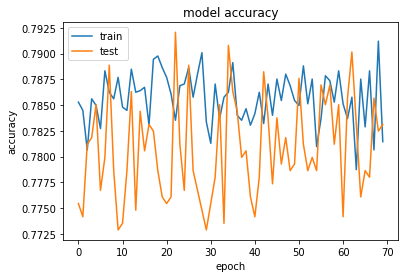

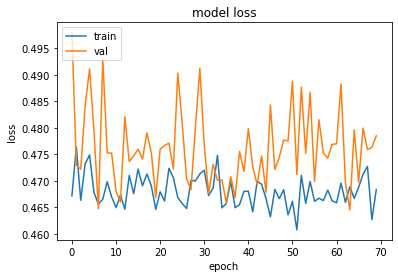

In [22]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()